In [24]:
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans, AgglomerativeClustering  
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt

df = pd.read_csv('CasusData.csv')
print(df)  #show all the data

       WAP001  WAP002  WAP003  WAP004  WAP005  WAP006  WAP007  WAP008  WAP009  \
0         100     100     100     100     100     100     100     100     100   
1         100     100     100     100     100     100     100     100     100   
2         100     100     100     100     100     100     100     -97     100   
3         100     100     100     100     100     100     100     100     100   
4         100     100     100     100     100     100     100     100     100   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
19932     100     100     100     100     100     100     100     100     100   
19933     100     100     100     100     100     100     100     100     100   
19934     100     100     100     100     100     100     100     100     100   
19935     100     100     100     100     100     100     100     100     100   
19936     100     100     100     100     100     100     100     100     100   

       WAP010  ...  WAP520 

C:\Users\TeunM\AppData\Local\Temp\ipykernel_23064\207668451.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(df['USERID'].unique()))


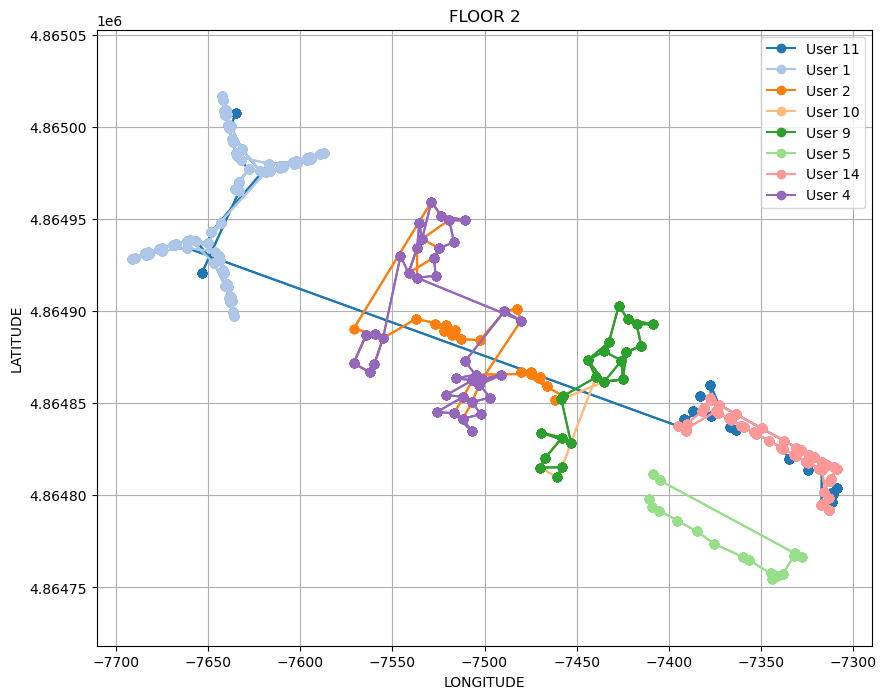

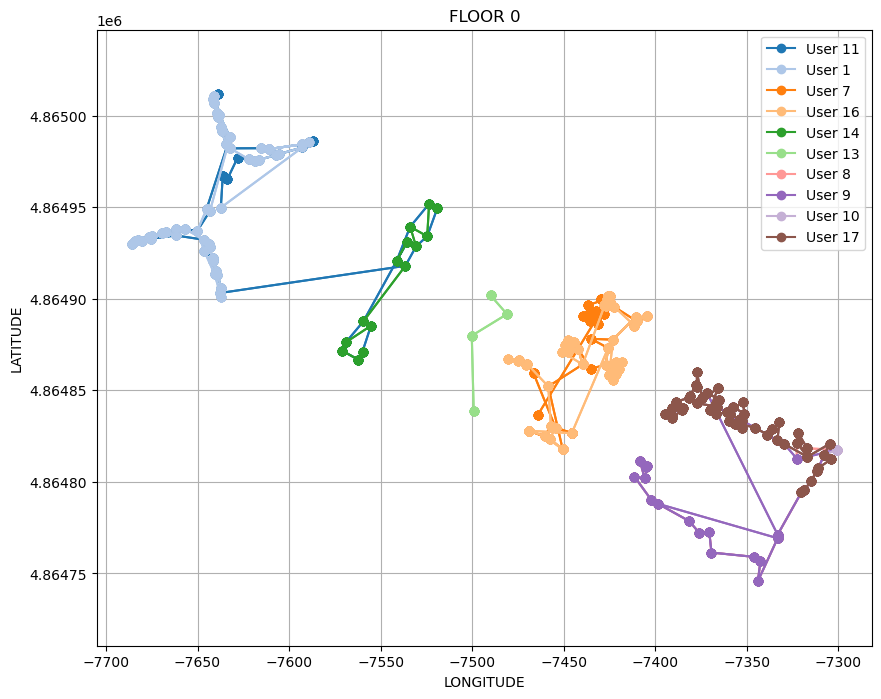

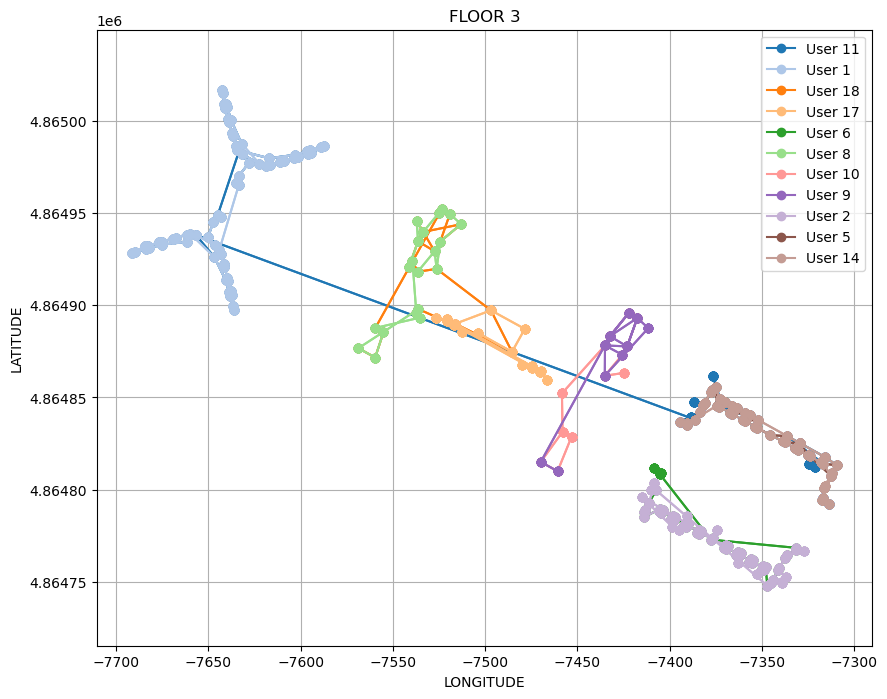

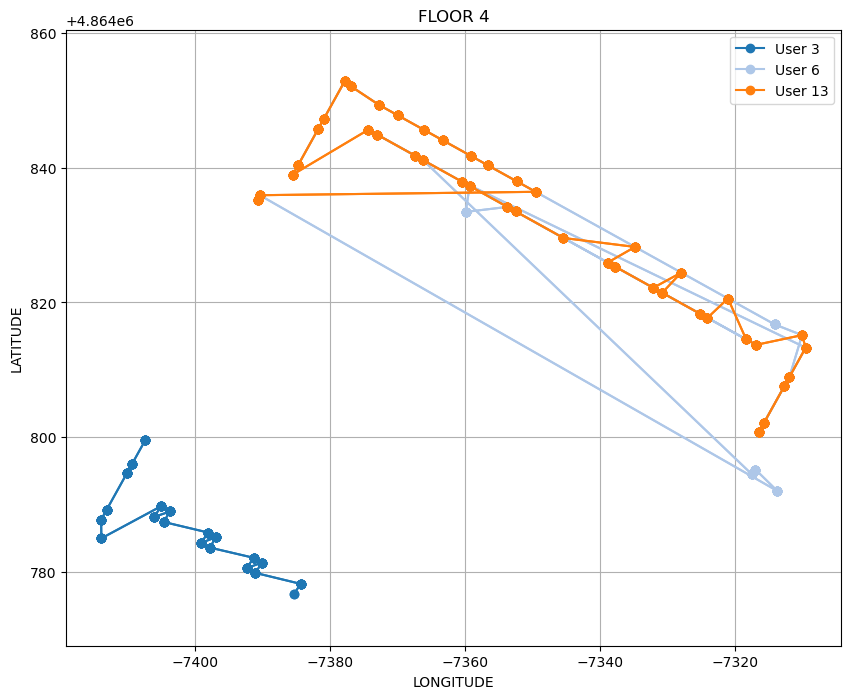

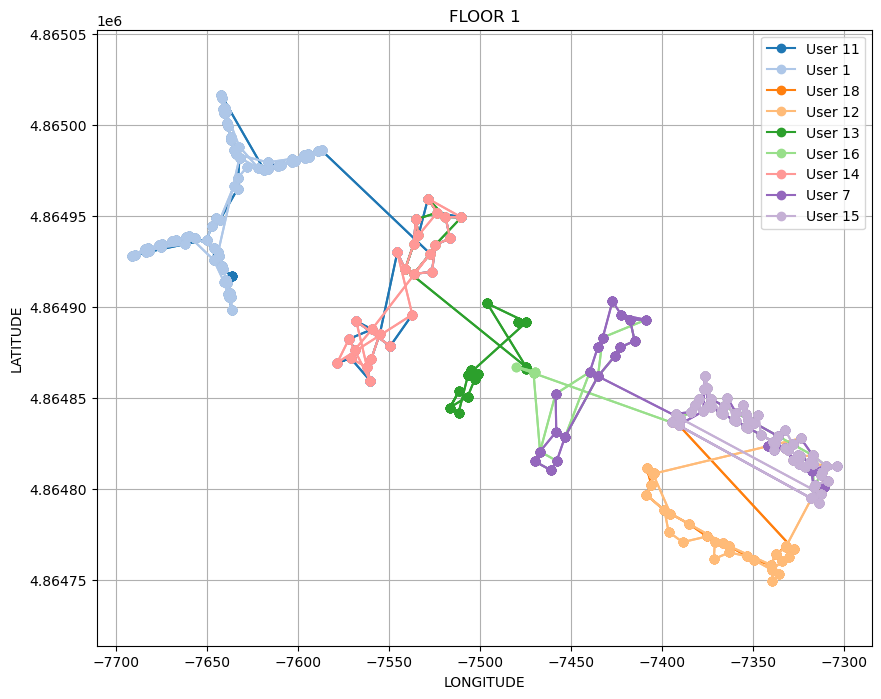

In [39]:
# Maak een kleurenpalet voor elke gebruiker (tab20 heeft 20 kleuren)
colors = plt.cm.get_cmap('tab20', len(df['USERID'].unique()))

# Maak een aparte plot voor elke verdieping
for FLOOR in df['FLOOR'].unique():
    plt.figure(figsize=(10, 8))
    
    # Filter de dataset voor de huidige verdieping
    FLOOR_data = df[df['FLOOR'] == FLOOR]
    
    # Sorteer de data op basis van TIMESTAMP
    FLOOR_data = FLOOR_data.sort_values(by='TIMESTAMP')
    
    # Plot de locaties van alle gebruikers per verdieping
    for i, user_id in enumerate(FLOOR_data['USERID'].unique()):
        user_data = FLOOR_data[FLOOR_data['USERID'] == user_id]
        
        # Teken lijnen tussen de locaties op basis van de tijd
        plt.plot(user_data['LONGITUDE'], user_data['LATITUDE'], marker='o', linestyle='-', color=colors(i), label=f'User {user_id}')
        plt.plot(user_data['LONGITUDE'], user_data['LATITUDE'], linestyle='-', color=colors(i))
    
    plt.title(f'FLOOR {FLOOR}')
    plt.xlabel('LONGITUDE')
    plt.ylabel('LATITUDE')
    plt.legend()
    
    # Zorg ervoor dat de verdeling op de x-as en y-as hetzelfde is
    plt.axis('equal')
    
    plt.grid(True)
    plt.show()